In [1]:
#import MDAnalysis
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import GRO, XTC
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from tqdm.auto import tqdm

In [2]:
u = mda.Universe("/Users/k20098771/Data/2023/CGtoAA/AF_CGtoAA_200us_step6_6.gro", "/Users/k20098771/Data/2023/CGtoAA/AF_CGtoAA_200us_300ns_nojump_center.xtc")
protein = u.select_atoms('protein')
print('There are {} residues in the protein'.format(len(protein.residues)))
#protein residues

There are 112 residues in the protein


In [3]:
u_1000 = u.trajectory
len(u_1000)
time=[]
for ts in tqdm(u_1000):
    time.append(u.trajectory.time)
time=np.array(time)
len(time)

  0%|          | 0/6001 [00:00<?, ?it/s]

6001

In [4]:
#Selection
TREM2_K26 = u.select_atoms('index 1419 and name NZ')#NZ 1420
print ('TREM2 :',TREM2_K26.resnames, len(TREM2_K26), 'residues')

DAP12_chainA_D16 = u.select_atoms('index 204 and name OD1') #OD2 206/ OD1 205
print ('DAP12 chain A:',DAP12_chainA_D16.resnames, len(DAP12_chainA_D16.positions), 'residues')

DAP12_chainB_D16 = u.select_atoms('index 700 and name OD1')#)OD2 702/ OD1 701
print ('DAP12 chain B:',DAP12_chainB_D16.resnames, len(DAP12_chainB_D16.positions), 'residues')

TREM2 : ['LYS'] 1 residues
DAP12 chain A: ['ASP'] 1 residues
DAP12 chain B: ['ASP'] 1 residues


In [5]:
#distances between K26 and D16 in Chain A
dist_timeA = []
for ts in tqdm(u_1000):
            dx = abs(TREM2_K26.positions[0,0]-DAP12_chainA_D16.positions[0,0])
            dy = abs(TREM2_K26.positions[0,1]-DAP12_chainA_D16.positions[0,1])
            dz = abs(TREM2_K26.positions[0,2]-DAP12_chainA_D16.positions[0,2])
            if dx > u.dimensions[0]/2.0:
                dx = u.dimensions[0]-dx
            if dy > u.dimensions[1]/2.0:
                dy = u.dimensions[1]-dy
            if dz > u.dimensions[2]/2.0:
                dz = u.dimensions[2]-dz
            dist = np.sqrt((dx*dx)+(dy*dy)+(dz*dz))
            dist_timeA.append(dist)
dist_timeA

  0%|          | 0/6001 [00:00<?, ?it/s]

[2.7685385,
 2.8666544,
 2.8043723,
 3.3390675,
 2.8833654,
 2.6969194,
 2.8040318,
 2.8590357,
 2.7282376,
 2.7716308,
 2.609371,
 2.7066216,
 2.60833,
 2.6481152,
 3.6577199,
 2.9412358,
 3.3940704,
 2.949476,
 2.6960864,
 2.900931,
 3.7354684,
 3.177501,
 3.5661998,
 4.257912,
 2.671594,
 3.335401,
 3.5442796,
 2.8300931,
 4.0736017,
 2.853351,
 2.6794229,
 2.95178,
 4.2906857,
 2.9027889,
 3.859908,
 3.1087599,
 2.8884628,
 2.6569934,
 2.7948184,
 2.7374973,
 2.783435,
 2.6491303,
 2.9735887,
 2.771427,
 2.702164,
 3.0114155,
 2.7231593,
 2.7729611,
 2.7785094,
 2.6546748,
 3.0047302,
 2.6683688,
 2.6964796,
 2.9394853,
 2.7851336,
 3.1439788,
 2.6803007,
 2.700756,
 2.7406754,
 2.6901855,
 2.8867142,
 2.8345242,
 3.038517,
 2.650529,
 2.6001945,
 2.7371693,
 2.6299233,
 2.8024423,
 2.8381367,
 2.7866478,
 2.8271723,
 2.9819984,
 2.7148664,
 2.676883,
 2.9526575,
 2.595419,
 2.9232512,
 2.972092,
 2.801892,
 2.761882,
 2.9415767,
 2.59079,
 2.6743739,
 2.6086607,
 2.624965,
 2.6712

In [6]:
#distances between K26 and D16 in Chain B
dist_timeB = []
for ts in tqdm(u_1000):
            dx = abs(TREM2_K26.positions[0,0]-DAP12_chainB_D16.positions[0,0])
            dy = abs(TREM2_K26.positions[0,1]-DAP12_chainB_D16.positions[0,1])
            dz = abs(TREM2_K26.positions[0,2]-DAP12_chainB_D16.positions[0,2])
            if dx > u.dimensions[0]/2.0:
                dx = u.dimensions[0]-dx
            if dy > u.dimensions[1]/2.0:
                dy = u.dimensions[1]-dy
            if dz > u.dimensions[2]/2.0:
                dz = u.dimensions[2]-dz
            dist = np.sqrt((dx*dx)+(dy*dy)+(dz*dz))
            dist_timeB.append(dist)
dist_timeB

  0%|          | 0/6001 [00:00<?, ?it/s]

[2.7848299,
 2.7274537,
 2.6809156,
 2.5033789,
 2.6838415,
 2.8382723,
 2.932132,
 2.7650294,
 3.060127,
 3.194586,
 2.8750274,
 2.906733,
 2.6870053,
 2.8047278,
 2.6523569,
 2.8011804,
 2.9689367,
 3.2615368,
 2.9430234,
 2.9739866,
 2.6598685,
 2.6157331,
 2.918218,
 2.951258,
 3.1073134,
 2.8701744,
 2.6316907,
 2.7855716,
 2.837483,
 3.0987077,
 3.1488762,
 2.6090012,
 2.7614152,
 2.8998823,
 2.6260452,
 3.0165844,
 3.197844,
 3.1177547,
 3.4047163,
 2.929539,
 2.9814446,
 2.723379,
 3.0723307,
 2.744504,
 2.7247765,
 2.7305977,
 2.6509237,
 2.5257032,
 2.7168574,
 2.9069276,
 2.7530744,
 3.0477982,
 2.6992779,
 2.7904158,
 2.802885,
 3.4524496,
 2.8236985,
 3.2200296,
 2.897862,
 2.944626,
 2.8822567,
 2.9495072,
 2.8890464,
 3.0102184,
 3.0170307,
 3.4743052,
 2.8193974,
 2.6518703,
 2.7764902,
 2.937365,
 2.9298127,
 2.8239906,
 2.7221544,
 2.9182339,
 2.9470172,
 2.9967313,
 2.9429405,
 2.9487953,
 2.8850808,
 3.0243425,
 3.0387852,
 2.9019501,
 2.7182531,
 2.8008928,
 2.7511

/var/folders/5n/x87wqjx13lbbpnmstj5zq1pm0000gq/T/ipykernel_40871/2037167079.py:14: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for i in leg.legendHandles:


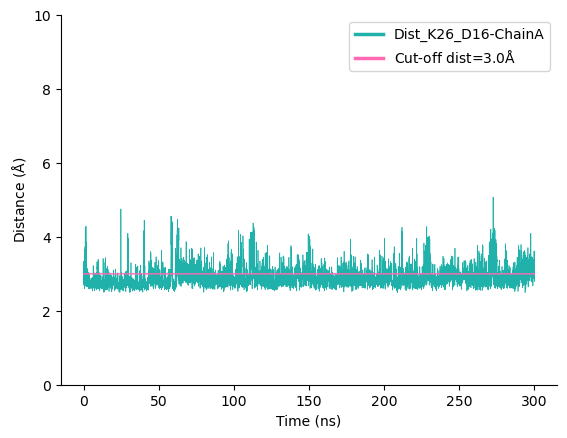

In [7]:
#plot distance
time_us = np.array(time)/1000
plt.xlabel('Time (ns)')
plt.ylabel('Distance ($\mathrm{\AA}$)')
plt.plot(time_us, dist_timeA, color='lightseagreen', label='Dist_K26_D16-ChainA', linewidth=0.5)
#plt.plot(time_ns, dist_timeB, color='lightsalmon', label='Dist_K26_D16-ChainB', linewidth=0.5)
y=np.zeros(len(time))
for i in range(len(time)):
    y[i]=3.0
plt.plot(time/1000, y, color='hotpink',label='Cut-off dist=3.0$\mathrm{\AA}$', linewidth=1 )
plt.ylim([0,10])
plt.legend(loc='best')
leg = plt.legend()
for i in leg.legendHandles:
    i.set_linewidth(2.5)
ax=plt.gca() ##get caurrent axis
ax.spines["right"].set_color("none") #visible for right spines
ax.spines["top"].set_color("none") ##visible for top spines
#plt.savefig("/Users/k20098771/Data/Figures/6z0g_AA_chainA_distance_sidechain.eps",dpi=600, format='eps')

/var/folders/5n/x87wqjx13lbbpnmstj5zq1pm0000gq/T/ipykernel_40871/3198779485.py:14: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for i in leg.legendHandles:


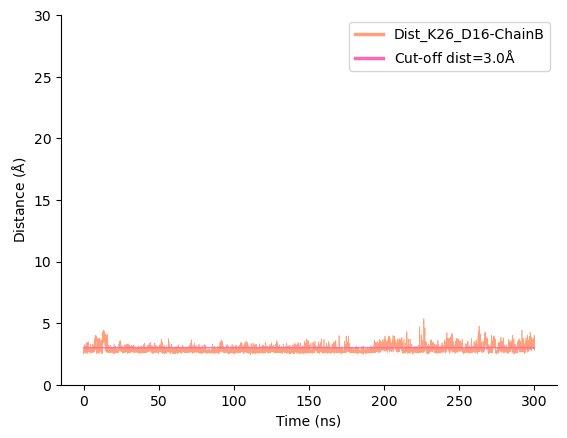

In [8]:
#plot
time_ns = np.array(time)/1000
plt.xlabel('Time (ns)')
plt.ylabel('Distance ($\mathrm{\AA}$)')
#plt.plot(time_ns, dist_timeA, color='lightsteelblue', label='Dist_K26_D16-ChainA', linewidth=0.5)
plt.plot(time_ns, dist_timeB, color='lightsalmon', label='Dist_K26_D16-ChainB', linewidth=0.5)
y=np.zeros(len(time))
for i in range(len(time)):
    y[i]=3.0
plt.plot(time/1000, y, color='hotpink',label='Cut-off dist=3.0$\mathrm{\AA}$', linewidth=1 )
plt.ylim([0,30])
plt.legend(loc='best')
leg = plt.legend()
for i in leg.legendHandles:
    i.set_linewidth(2.5)
ax=plt.gca() ##get caurrent axis
ax.spines["right"].set_color("none") #visible for right spines
ax.spines["top"].set_color("none") ##visible for top spines
#plt.savefig("/Users/k20098771/Data/Figures/6z0g_AA_chainB_distance_sidechain.eps",dpi=600, format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


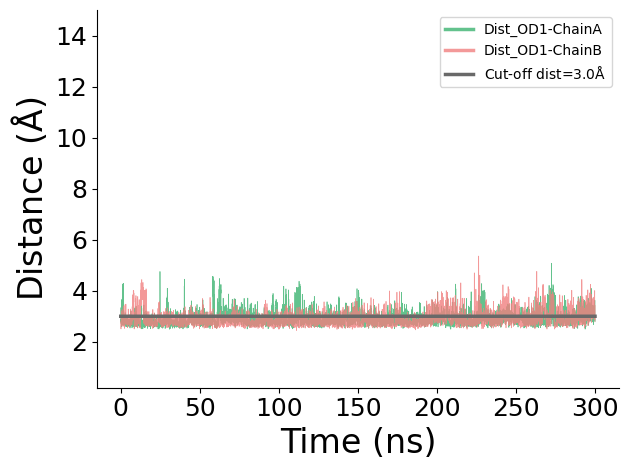

In [9]:
#plot
time_ns = np.array(time)/1000
plt.xlabel('Time (ns)', fontsize=24)
plt.ylabel('Distance ($\mathrm{\AA}$)', fontsize=24)

# Increase the font size for x-axis ticks
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()
plt.plot(time_ns, dist_timeA, color='mediumseagreen', label='Dist_OD1-ChainA', linewidth=0.5,alpha=0.8)
plt.plot(time_ns, dist_timeB, color='lightcoral', label='Dist_OD1-ChainB', linewidth=0.5,alpha=0.8)
y=np.zeros(len(time))

for i in range(len(time)):
    y[i]=3.0
plt.plot(time/1000, y, color='dimgray',label='Cut-off dist=3.0$\mathrm{\AA}$', linewidth=2.5 )
plt.ylim([0.2,15])
plt.legend(loc='best')
leg = plt.legend()
for i in leg.legend_handles:
    i.set_linewidth(2.5)
ax=plt.gca() ##get caurrent axis
ax.spines["right"].set_color("none") #visible for right spines
ax.spines["top"].set_color("none") ##visible for top spines

# Add shaded region
#ax.axhspan(2.5, 3.5, facecolor='gray', alpha=0.3)

# Add label to the shaded region
#ax.text(200, 2, 'Hydrogen bond distance region', ha='center', va='center', color='black', fontsize=7, backgroundcolor='white')


plt.savefig("/Users/k20098771/Data/Figures/AF_AA_chainAB_distance_sidechain.eps",dpi=800, format='eps')